** Importing python libraries.**

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Reading Salaries.csv as a dataframe called sal.**

In [2]:
sal=pd.read_csv('Salaries.csv')

** Checking the head of the DataFrame. **

In [140]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


** Finding out how many entries there are.**

In [4]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**Checking for null entries**

In [5]:
sal.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

(0.0, 300000.0)

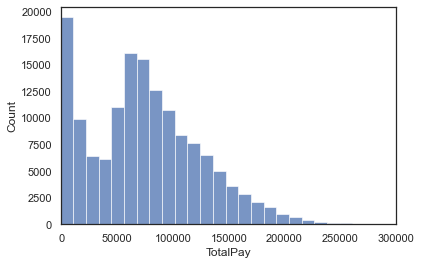

In [133]:
sns.histplot(sal['TotalPay'],bins=50)
plt.xlim(0,300000)

**Average BasePay**

In [8]:
sal['BasePay'].mean()

66325.44884050643

** Number of employees with unique JobTitles**

In [9]:
sal['JobTitle'].nunique()

2159

**Top 5 common Jobs**

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Transit Operator'),
  Text(1, 0, 'Special Nurse'),
  Text(2, 0, 'Registered Nurse'),
  Text(3, 0, 'Public Svc Aide-Public Works'),
  Text(4, 0, 'Police Officer 3')])

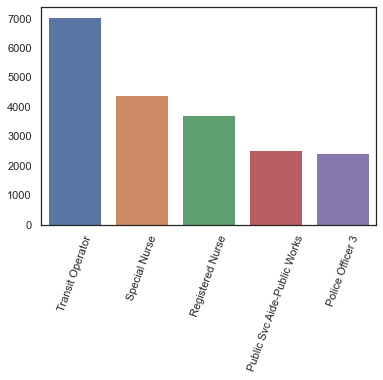

In [451]:
a=sal['JobTitle'].value_counts().head().index
b=sal['JobTitle'].value_counts().head().values
sns.barplot(x=a,y=b)
plt.xticks(rotation=70)

**Total number of Jobs**

Text(0.5, 1.0, 'Number of jobs')

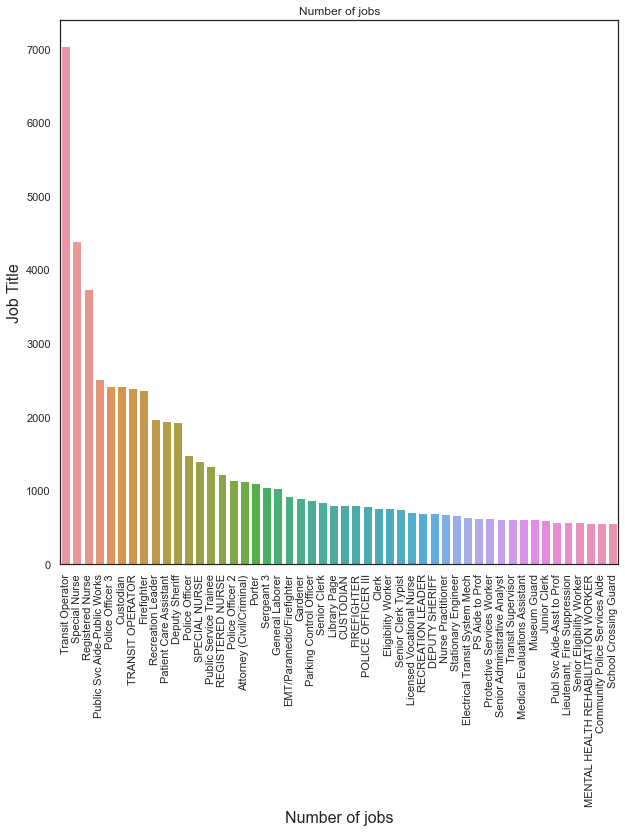

In [380]:
plt.figure(figsize=(10,10))
sns.barplot(data=sal,x=sal['JobTitle'].value_counts().nlargest(50).index,y= sal['JobTitle'].value_counts().nlargest(50).values)
plt.xticks(rotation=90)
plt.xlabel('Number of jobs', fontsize=16)
plt.ylabel("Job Title", fontsize=16)
plt.title("Number of jobs")

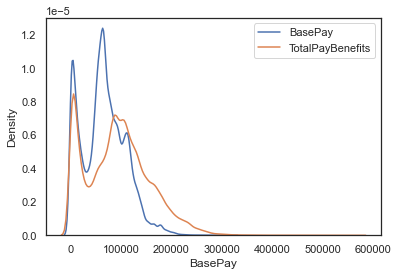

In [142]:
sns.kdeplot(sal['BasePay'])
sns.kdeplot(sal['TotalPayBenefits'])
plt.legend(['BasePay','TotalPayBenefits'])

<Figure size 720x720 with 0 Axes>

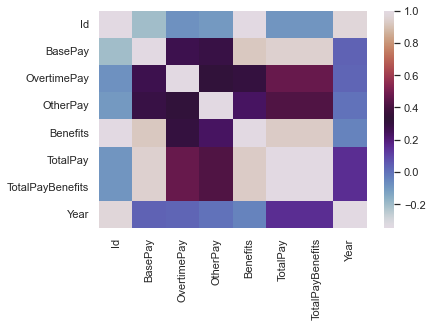

<Figure size 720x720 with 0 Axes>

In [365]:
sns.heatmap(sal.corr(),cmap='twilight')
plt.figure(figsize=(10,10))

** Maximum BasePay**

In [18]:
sal['BasePay'].max()

319275.01

**Highest amount of OvertimePay in the dataset**

In [51]:
sal['OvertimePay'].max()

245131.88

**TotalPayBenefits in each Year**

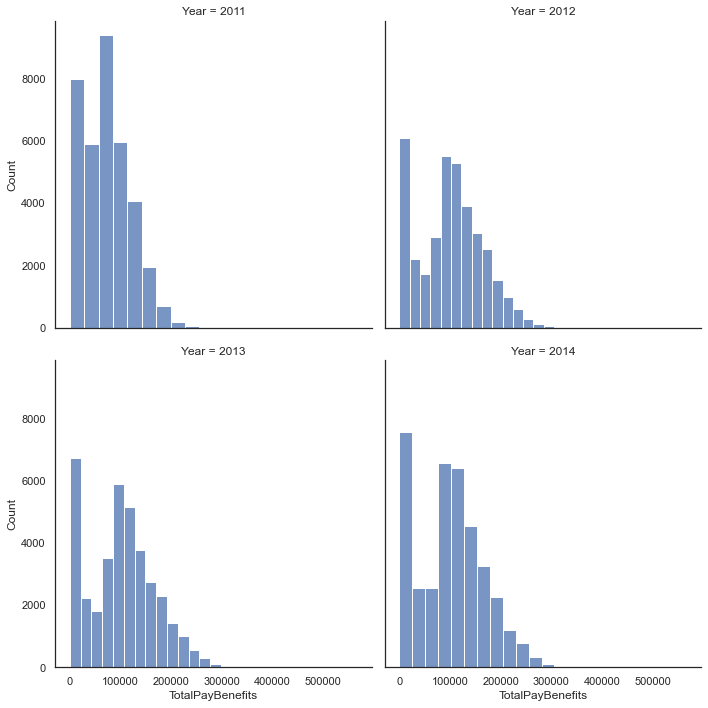

In [171]:
a=sns.FacetGrid(data=sal,col='Year',col_wrap=2,height=5)
a.map(sns.histplot,'TotalPayBenefits',bins=20)

**5 Employee with maximum BasePay**

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

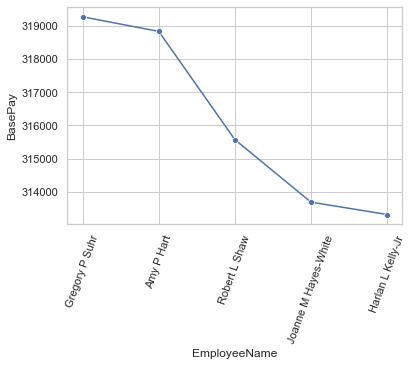

In [209]:
new_df=sal.sort_values(by='BasePay',ascending=False)
sns.set_theme(style='whitegrid')
sns.lineplot(data=new_df[:5],x='EmployeeName',y='BasePay',marker='o')
plt.xticks(rotation=70)

**5 Employee with maximum TotalPayBenefits**

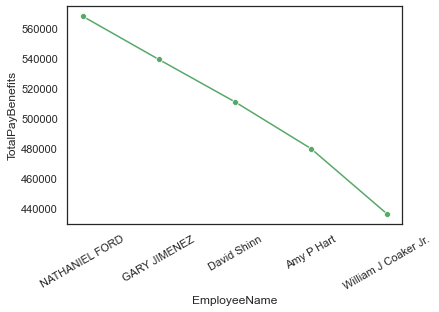

In [453]:
new_df=sal.sort_values(by='TotalPayBenefits',ascending=False)
sns.lineplot(data=new_df[:5],x='EmployeeName',y='TotalPayBenefits',marker='o',color='g')
plt.xticks(rotation=30)
sns.set_theme(style='white')

**5 Employee with maximum TotalPay**

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

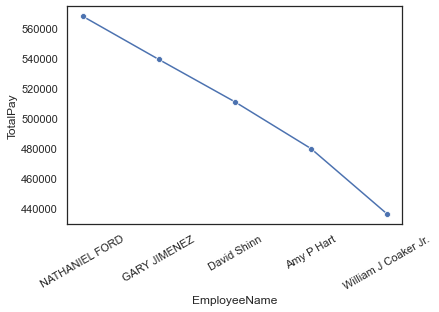

In [205]:
new_df=sal.sort_values(by='TotalPay',ascending=False)
sns.lineplot(data=new_df[:5],x='EmployeeName',y='TotalPay',marker='o')
plt.xticks(rotation=30)

**5 JobTitle with maximum Total Pay allotment**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Transit Operator'),
  Text(1, 0, 'Registered Nurse'),
  Text(2, 0, 'Firefighter'),
  Text(3, 0, 'Police Officer 3'),
  Text(4, 0, 'Deputy Sheriff'),
  Text(5, 0, 'Sergeant 3'),
  Text(6, 0, 'Attorney (Civil/Criminal)'),
  Text(7, 0, 'Police Officer 2'),
  Text(8, 0, 'Police Officer'),
  Text(9, 0, 'Custodian')])

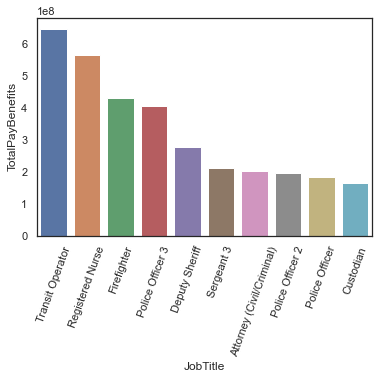

In [455]:
df=sal.groupby('JobTitle').sum('TotalPayBenefits').sort_values(by='TotalPayBenefits',ascending=False).head(10)
a=df.index
b=df['TotalPayBenefits']
sns.barplot(data=df,x=a,y=b)
plt.xticks(rotation=70)

**What is the job title of JOSEPH DRISCOLL?**

In [250]:
sal[sal['EmployeeName']=='JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

**Pay distribution of JOSEPH DRISCOLL**

In [463]:
df=sal[sal['EmployeeName']=='JOSEPH DRISCOLL']
x=['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']
y=[]
for i in x:
    y.append(df[i][24])

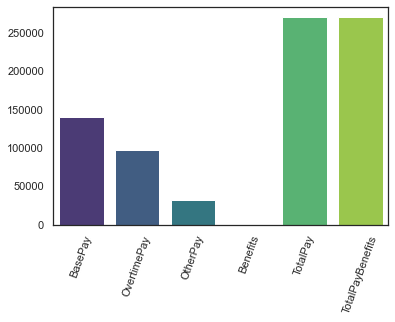

In [464]:
sns.barplot(y=y,x=x,palette='viridis')
plt.xticks(rotation=70);

** Average BasePay of all employees per year**

<AxesSubplot:xlabel='Year'>

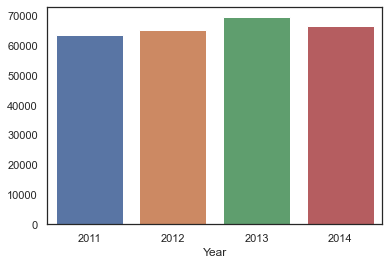

In [459]:
df=sal.groupby('Year')['BasePay'].mean()
a=df.index
b=df.values
sns.barplot(x=a,y=b)

**How many people have the word Captain in their job title?**

In [339]:
def title(word):
    if 'chief'in word.lower():
        return True
    else:
        return False

In [340]:
sum(sal['JobTitle'].apply(lambda x:title(x)))

627